In [1]:
# Cargar librerías keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)  #semilla
from keras.datasets import mnist  #cargar el conjunto de datos
from keras.utils import np_utils  #para generar las múltiples clases
from keras.layers.convolutional import Conv2D, MaxPooling2D  #para las capas convolucionales
from keras.layers.core import Flatten, Dense  #red neuronal común


In [2]:
# Lectura del conjunto de datos y división para entrenamiento y validación
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


PREPROCESAMIENTO DE LOS DATOS

In [3]:
# Normalizar los datos:
# Como son imágenes, los valores de los pixeles oscilan entre 0 y 255
# pero se requiere que estén entre 0 y 1, por tanto se dividen entre 255

X_train = x_train/255.0
X_test = x_test/255.0

En este caso tenemos 10 categorías. Estas se pueden representar con el formato de one-hot. Acá se tiene un vector de 10 elementos (es decir el mismo número de categorías) donde sólo uno de estos elementos será diferente de cero. Por ejemplo, si la categoría es 0 la representación one-hot correspondiente será el arreglo [1,0,0,0,0,0,0,0,0,0].

In [4]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

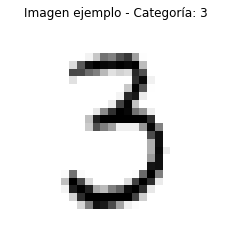

In [5]:
#Visualizar una imagen
nimagen = 50
plt.imshow(X_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(Y_train[nimagen])))
plt.axis('off')
plt.show()

In [6]:
#Indicar que solo se usará un canal de color (escala de grises)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

ENTRENAMIENTO

In [7]:
# Construir el modelo de red neuronal
modelo = Sequential()  #CONTENEDOR DEL MODELO
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

#Aplanar la red para que se convierta en vector y crear la red neuronal con dos capas ocultas
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclasses,activation='sigmoid'))

In [8]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:
#Compilar el modelo
#Se usa el optimizer SGD porque es un ejemplo multiclase

modelo.compile(tf.keras.optimizers.SGD(0.2), loss='categorical_crossentropy',
                   metrics=['accuracy'])

ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000023AC26739D0>

In [ ]:
#Entrenar el modelo
#Se harán 10 iteraciones, en lotes de 128 y que se imprima la información. Con validation_data evalúa de una vez 
#la precisión de la validación
modeloEntrenado = modelo.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=2, validation_data=(X_test,Y_test))

Epoch 1/10
469/469 - 21s - loss: 0.3039 - accuracy: 0.9009 - val_loss: 0.0771 - val_accuracy: 0.9751
Epoch 2/10
469/469 - 20s - loss: 0.0740 - accuracy: 0.9764 - val_loss: 0.0513 - val_accuracy: 0.9827
Epoch 3/10
469/469 - 20s - loss: 0.0527 - accuracy: 0.9832 - val_loss: 0.0622 - val_accuracy: 0.9811
Epoch 4/10
469/469 - 20s - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0410 - val_accuracy: 0.9858
Epoch 5/10
469/469 - 20s - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 6/10
469/469 - 20s - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0418 - val_accuracy: 0.9870
Epoch 7/10
469/469 - 20s - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 8/10
469/469 - 20s - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0421 - val_accuracy: 0.9863
Epoch 9/10
469/469 - 20s - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 10/10
469/469 - 20s - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0392 - val_accura

Se observa que la precisión del entrenamiento supera el 99% y en la validación el 98%, siendo mejor que con una red neuronal convencional

Graficar pérdida y precisión

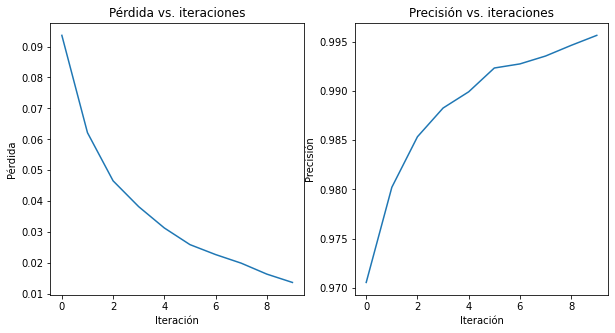

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

VALIDACIÓN

In [ ]:
#Se hace la comprobación enviándole datos al modelo que NO haya visto
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 99.0%


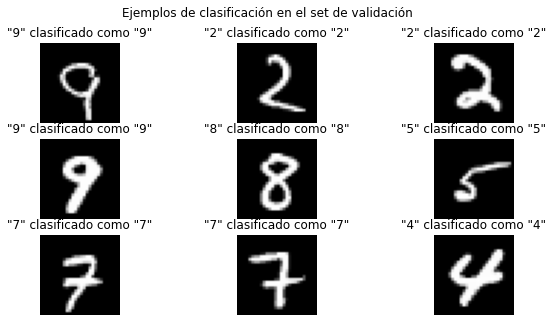

In [ ]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()

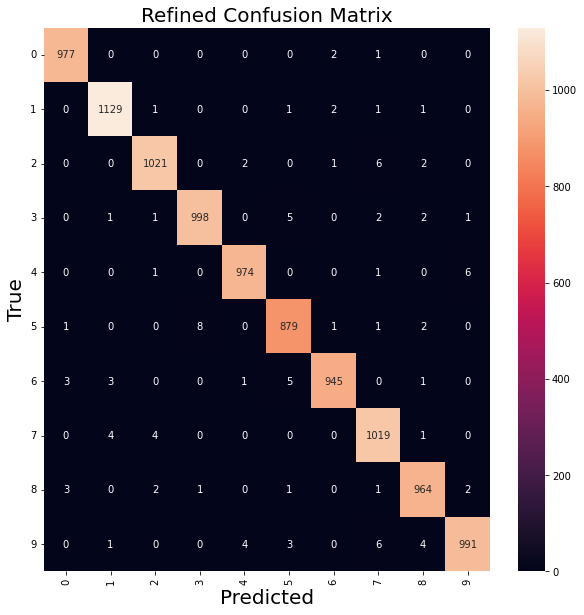

In [ ]:
#Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['0','1','2','3','4','5','6','7','8','9']
#Y_pred = modelo.predict(X_test)
#classes_y=np.argmax(Y_pred,axis=1)
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


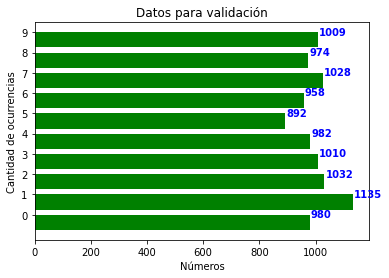

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.DataFrame(y_test, columns = ['Número'])
conteo=Counter(y_test)
conteo_ordenado = [0 for i in range(10)]
print(conteo)
for num, cont in conteo.items():
  conteo_ordenado[num] = cont 
print(conteo_ordenado)

fig, ax = plt.subplots() 
ind = np.arange(len(conteo_ordenado))  #ubicaciones de los grupos
width = 0.75  #ancho de la barra
ax.barh(ind, conteo_ordenado, width, color = "green") 

ax.set_yticks(ind+width/2)  
ax.set_yticklabels(class_names, minor=False)
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Números')
plt.title('Datos para validación')
for i, v in enumerate(conteo_ordenado):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()